# Lösungen zu den Python-Aufgaben aus Kapitel 3

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display

## Aufgabe 1

### a)

(Hier könnte natürlich auch gleich nur mit Sympy gearbeitet werden)

Datenset definieren:

In [5]:
x = np.array([0.85,0.18,0.05,0.36,0.28,0.53,0.31,0.30,0.11,0.25])
y = np.array([-1.90,0.00,0.59,-0.31,-1.12,-0.46,-0.78,1.00,0.46,-0.49])
z = np.array([0.85,0.15,0.05,0.33,0.29,0.47,0.27,0.34,0.15,0.29])
X = np.vstack([x,y,z]).T
sp.Matrix( X )

Matrix([
[0.85,  -1.9, 0.85],
[0.18,     0, 0.15],
[0.05,  0.59, 0.05],
[0.36, -0.31, 0.33],
[0.28, -1.12, 0.29],
[0.53, -0.46, 0.47],
[0.31, -0.78, 0.27],
[ 0.3,   1.0, 0.34],
[0.11,  0.46, 0.15],
[0.25, -0.49, 0.29]])

Kovarianzmatrix berechnen:

In [10]:
X0 = X - np.mean(X, axis=0)
C = 1/(X0.shape[0]-1) * X0.T @ X0
sp.Matrix( np.round(C, 4) )

Matrix([
[ 0.0522, -0.1443,  0.0498],
[-0.1443,  0.7416, -0.1347],
[ 0.0498, -0.1347,  0.0488]])

Korrelationsmatrix:

In [12]:
Xs = (X - np.mean(X, axis=0))/np.std(X, axis=0, ddof=1)
R = 1/(Xs.shape[0]-1) * Xs.T @ Xs
sp.Matrix( np.round(R, 4) )

Matrix([
[    1.0, -0.7333,  0.9876],
[-0.7333,     1.0, -0.7083],
[ 0.9876, -0.7083,     1.0]])

Alle Variablen korrelieren relativ stark miteinander, $x$ und $z$ dabei sehr stark positiv (0.99) und $x$ und $y$ bzw. $y$ und $z$ etwas schwächer negativ (-0.73 bzw. -0.71). Unterstützung mit Visualisierung:

Text(0, 0.5, 'z')

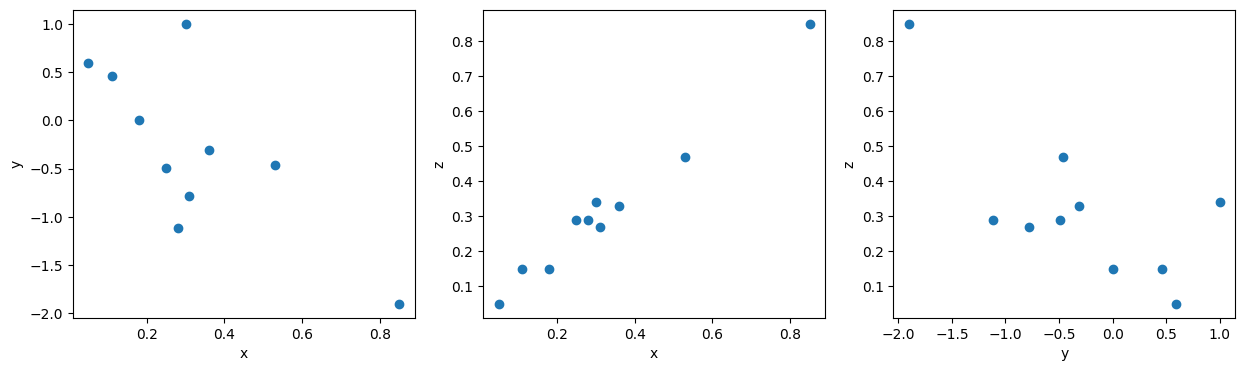

In [18]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.scatter(X[:,0], X[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1,3,2)
plt.scatter(X[:,0], X[:,2])
plt.xlabel("x")
plt.ylabel("z")
plt.subplot(1,3,3)
plt.scatter(X[:,1], X[:,2])
plt.xlabel("y")
plt.ylabel("z")

### b)

In [23]:
ew, ev = np.linalg.eig( C )
sort_order = np.flip( np.argsort( ew ) )
ew = ew[sort_order]
ev = ev[:,sort_order]
ew

array([7.97495871e-01, 4.45040489e-02, 5.93413011e-04])

In [26]:
sp.Matrix( np.round(ev,4) )

Matrix([
[-0.1988, 0.6774,  0.7082],
[ 0.9622, 0.2723,  0.0096],
[-0.1863, 0.6833, -0.7059]])

In [29]:
V = ev
sp.Matrix( np.round( V.T @ C @ V, 4 ) )

Matrix([
[0.7975,      0,      0],
[     0, 0.0445,      0],
[     0,      0, 0.0006]])

Varianzanteile:

In [34]:
np.round( ew/np.sum(ew), 3 )

array([0.946, 0.053, 0.001])

Erste Dimension = erste Hauptkomponente erklärt 94.6% der Varianz!

### c)

In [36]:
np.round( V.T @ V, 10 )

array([[ 1., -0.,  0.],
       [-0.,  1., -0.],
       [ 0., -0.,  1.]])

Einheitsmatrix!

In [37]:
np.linalg.det(V)

1.0

(-1.0 wäre auch möglich)